## Difference between Machine Learning and Deep Learning

![](img/AI-vs-ML-vs-Deep-Learning.png)
[https://www.edureka.co/blog/ai-vs-machine-learning-vs-deep-learning/](https://www.edureka.co/blog/ai-vs-machine-learning-vs-deep-learning/)

Deep Learning is a subset of ML, which is a subset of AI 

![](img/accuracy_vs_interpretability.png)
[https://medium.com/ansaro-blog/interpreting-machine-learning-models-1234d735d6c9g/)

Where does Deep Learning/Neural Nets fit in what we have already talked about.  Neural nets which is the algorithm used in deep learning.  We see it is really accurate, but not very interpretable.  Neural nets are often referred to as a black-box algorithm.  

If you are going to use a neural net, you need to be aware of that.  Shouldn't be used in some scenarios
- loans 

![](img/MLvsDL.png)
[https://lawtomated.com/a-i-technical-machine-vs-deep-learning/](https://lawtomated.com/a-i-technical-machine-vs-deep-learning/)

With traditional machine learning you have to come up with the features yourself.  If you want to predict some images of cars, you have to come up with the features that are important (body style, number of doors, number of windows, etc).  With deep learning, it comes up with the features that are important.  You give it a bunch of images of cars and it finds the important features for you.  

Deep learning does really well with unstructured data - image data, text data - where coming up with features is really difficult. 

Sometimes overkill with structured data 

## What is a neural network? 

<img src="img/Deeper_network.jpg" width=800> 

- Input Layer 
- Hidden layers 
- Each circle is referred as a node
- each line is a weight 
- output layer 

- relate back to King County 

### At the Node Level 

<img src="img/new_slogref.png" width=600>

- Inputs multiplied by the weights and added together (dot product)
- Activation function is applied (it's a way to turn some nodes on and off - similar to how different neurons fire in your brain)

### Using Numpy 

1. Create Dataset 

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

## features
input_data = np.array([[0,1,0],
                   [0,0,1],
                   [1,0,0],
                   [1,1,0],
                   [1,1,1],
                   [0,1,1],
                   [0,1,0]])
## targets
labels = np.array([[1,
                    0,
                    0,
                    1,
                    1,
                    0,
                    1]])
labels = labels.reshape(7,1)

2. Randomly assign weights and bias 

In [3]:
# create random weights at the beginning 
np.random.seed(11)
weights = np.random.rand(3,1) ## one for each feature
bias = np.random.rand(1) ## bias term
lr = 0.05 ## learning rate

3. Create activation function and derivative (needed for gradient descent)

In [4]:
## activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

## activation function derivative
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

4. Run through neural network 1000 times and update the weights 

In [5]:
w1, w2, w3, b, mse_ = [],[],[],[],[]
for epoch in range(1000):
    w1.append(weights[0])
    w2.append(weights[1])
    w3.append(weights[2])
    b.append(bias)
    inputs = input_data
    ## feed forward
    XW = np.dot(inputs, weights) + bias
    z = sigmoid(XW)
    ## error calcualtion
    error = z - labels
    mse_.append(mean_squared_error(z, labels))
    ## slope = input x dcost(derivative of cost function - MSE) x dpred (derivative of predictions)
    dcost = error
    dpred = sigmoid_derivative(z)
    z_del = dcost * dpred
    inputs = input_data.T
    ## backpropagation of errors (updating of weights and bias)
    weights = weights - lr*np.dot(inputs, z_del)
    for num in z_del:
        bias = bias - lr*num
    if (epoch > 0) & (epoch % 100 == 0):
        print(f'{epoch} - MSE: {mean_squared_error(z, labels)}')

100 - MSE: 0.17229031253119156
200 - MSE: 0.12839884481497565
300 - MSE: 0.10738835499614373
400 - MSE: 0.0944082796803326
500 - MSE: 0.08501221250103826
600 - MSE: 0.07756736912177735
700 - MSE: 0.07134926722714707
800 - MSE: 0.06598760804042995
900 - MSE: 0.06127124941676844


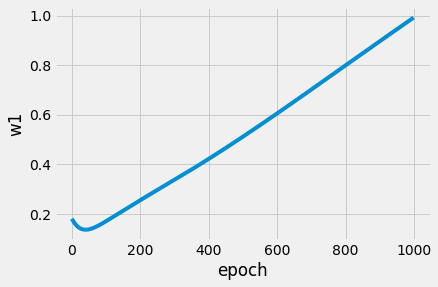

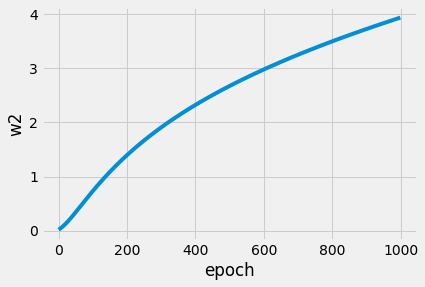

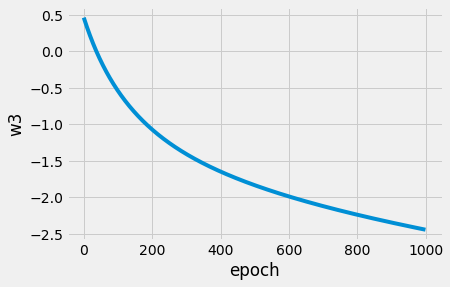

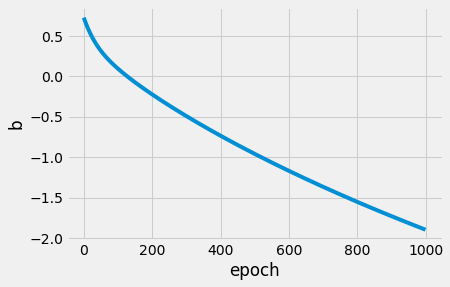

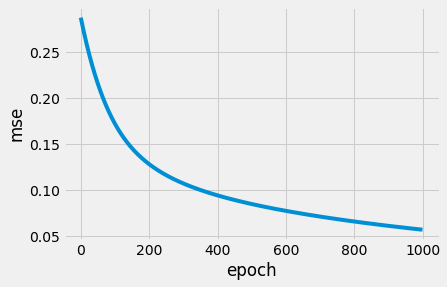

In [134]:
with plt.style.context('fivethirtyeight'):
    plt.plot(w1); plt.ylabel('w1'); plt.xlabel('epoch'); plt.show();
    plt.plot(w2); plt.ylabel('w2'); plt.xlabel('epoch'); plt.show();
    plt.plot(w3); plt.ylabel('w3'); plt.xlabel('epoch'); plt.show();
    plt.plot(b); plt.ylabel('b'); plt.xlabel('epoch'); plt.show();
    plt.plot(mse_); plt.ylabel('mse'); plt.xlabel('epoch'); plt.show();

## Neural Network in Keras 

In [180]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples = 10000, n_features=1000, n_informative=950,  
                      noise = 10, random_state=11)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [185]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 5, n_estimators=20)
rf.fit(X_train, y_train)
rf_mse = mean_squared_error(y_test, rf.predict(X_test))
rf_mse

CPU times: user 44 s, sys: 391 ms, total: 44.4 s
Wall time: 45.1 s


3144569.718744765

## [Go To Slide Deck](https://docs.google.com/presentation/d/1v87P-kvlsMypFCd6OHLVl_vgoVhrlnQzdzj-nr9GgcY/edit?usp=sharing)

- Choose Activation layer in last layer and loss function https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/
- RELU https://datascience.stackexchange.com/questions/23493/why-relu-is-better-than-the-other-activation-functions

- Paper on Optimizers https://arxiv.org/abs/2007.01547?utm_campaign=The%20Batch&utm_medium=email&_hsmi=94911242&_hsenc=p2ANqtz-8BbQqoa7BDj8eCsw_hDt4jwz_HFclMx-GD6ktFZjzY_6HiFRvMBSxbXZLE3rL43nVZyZo5nC008VutUZ44wQRZVS51FA&utm_content=94911242&utm_source=hs_email

![](img/activation_functions.png)

In [189]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, activation="relu", input_shape=(1000,)))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation = 'linear'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 8)                 8008      
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 5         
Total params: 8,049
Trainable params: 8,049
Non-trainable params: 0
_________________________________________________________________


In [191]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mse'])
history = model.fit(X_train, y_train, batch_size=64, nb_epoch=10, verbose=1, 
                    validation_data=(X_test, y_test))

/Users/jeffreyherman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 0s 39us/step - loss: 3214698.0940 - mse: 3214698.5000 - val_loss: 3260269.3960 - val_mse: 3260269.5000
Epoch 2/10
8000/8000 [==============================] - 0s 20us/step - loss: 3209338.6620 - mse: 3209339.2500 - val_loss: 3251193.8880 - val_mse: 3251193.7500
Epoch 3/10
8000/8000 [==============================] - 0s 20us/step - loss: 3187611.2840 - mse: 3187610.5000 - val_loss: 3217730.2920 - val_mse: 3217730.2500
Epoch 4/10
8000/8000 [==============================] - 0s 20us/step - loss: 3125777.5260 - mse: 3125777.5000 - val_loss: 3139013.7520 - val_mse: 3139014.0000
Epoch 5/10
8000/8000 [==============================] - 0s 21us/step - loss: 3002946.2900 - mse: 3002946.0000 - val_loss: 3002725.0400 - val_mse: 3002724.2500
Epoch 6/10
8000/8000 [==============================] - 0s 21us/step - loss: 2810173.8070 - mse: 2810173.5000 - val_loss: 2805341.8120 - val_mse: 2805341.750

In [197]:
history.history['val_mse'][-1] < rf_mse

True

In [199]:
print(f'MSE RF: {rf_mse}')
print(f'MSE NN: {history.history["val_mse"][-1]}')

MSE RF: 3144569.718744765
MSE NN: 1605759.125


In [200]:
history.history['val_mse'][-1] / rf_mse

0.5106451020717008

In [205]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [206]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [207]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

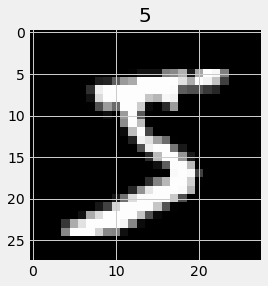

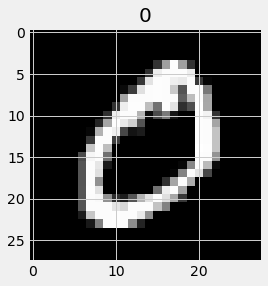

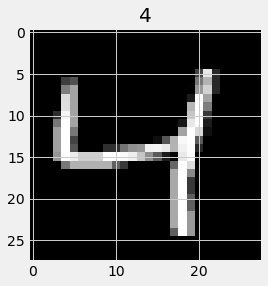

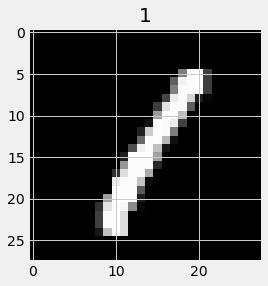

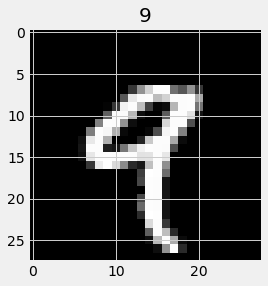

In [211]:
for i in range(5):
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])
    plt.show()

In [212]:
X_train = X_train.astype('float32')
X_test_norm = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [224]:
from keras import utils

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [227]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [228]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [229]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

In [230]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_40 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [231]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=64, nb_epoch=10, verbose=1, 
                    validation_data=(X_test, y_test))

/Users/jeffreyherman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3503 - acc: 0.9026 - val_loss: 0.1972 - val_acc: 0.9444
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.1686 - acc: 0.9516 - val_loss: 0.1466 - val_acc: 0.9583
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.1241 - acc: 0.9646 - val_loss: 0.1173 - val_acc: 0.9648
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0990 - acc: 0.9715 - val_loss: 0.1035 - val_acc: 0.9686
Epoch 5/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0816 - acc: 0.9762 - val_loss: 0.0932 - val_acc: 0.9697
Epoch 6/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0701 - acc: 0.9791 - val_loss: 0.0864 - val_acc: 0.9722
Epoch 7/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0601 - acc: 0.9820 - val_loss: 0.0848 - val_acc

In [233]:
# check out an incorrect prediction
predictions = model.predict(X_test)
predictions

array([[4.68574370e-07, 1.46431020e-07, 2.01364765e-05, ...,
        9.93778765e-01, 1.02032400e-05, 7.70365295e-06],
       [9.91490833e-06, 5.34723094e-03, 9.94388163e-01, ...,
        6.41321926e-11, 1.21069415e-05, 1.18744278e-14],
       [2.85106580e-07, 9.99223471e-01, 4.53170251e-05, ...,
        2.08514568e-04, 4.02929232e-04, 1.67690123e-05],
       ...,
       [3.81560408e-12, 4.05723961e-11, 1.16181344e-11, ...,
        2.71906310e-06, 9.90326134e-06, 5.03993306e-06],
       [1.42029485e-10, 5.07143841e-11, 1.66651025e-12, ...,
        1.01192096e-10, 1.38822325e-05, 1.86970335e-11],
       [1.40881884e-08, 1.05169949e-10, 6.54120225e-09, ...,
        5.66087585e-12, 1.35734176e-11, 1.47480327e-11]], dtype=float32)

In [238]:
np.argmax(y_test, axis = 1)

array([7, 2, 1, ..., 4, 5, 6])

In [240]:
Y_True = np.argmax(y_test, axis = 1)

In [245]:
X_test = X_test.reshape(10000, 28, 28)

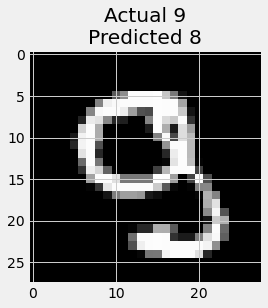

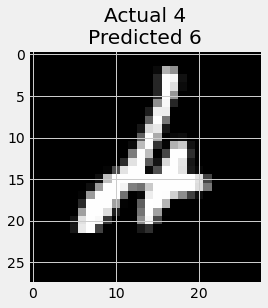

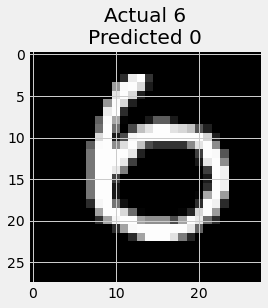

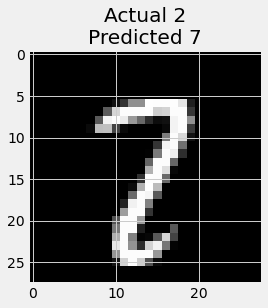

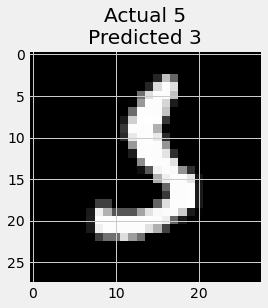

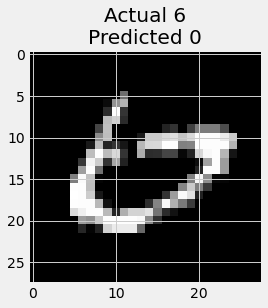

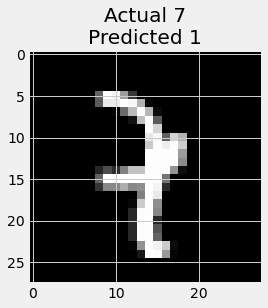

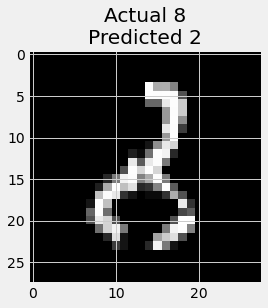

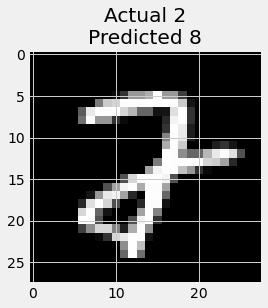

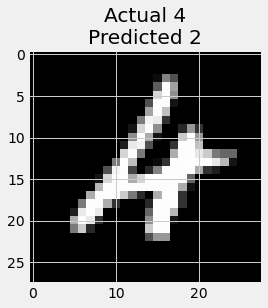

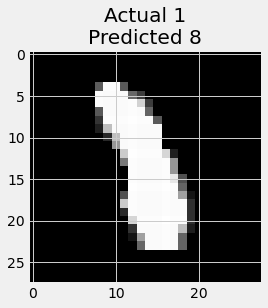

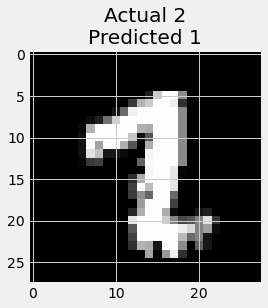

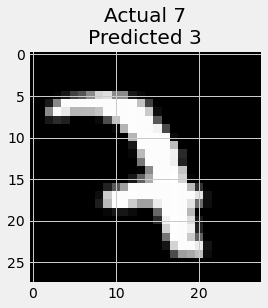

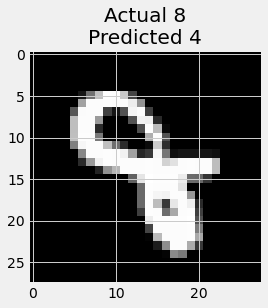

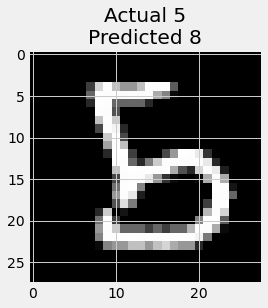

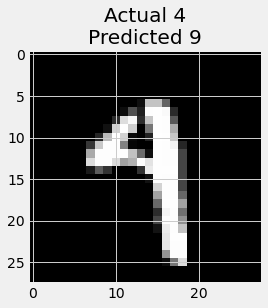

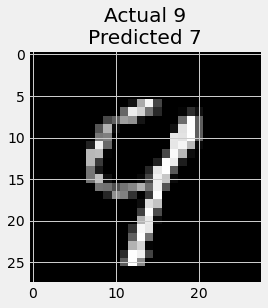

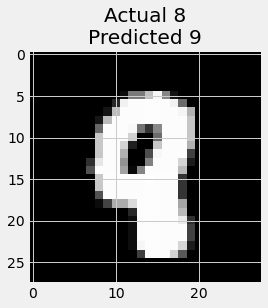

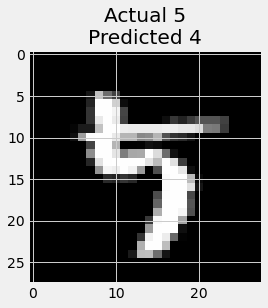

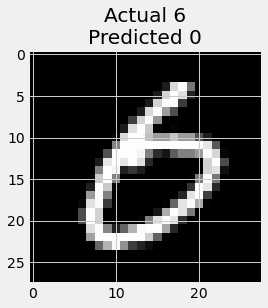

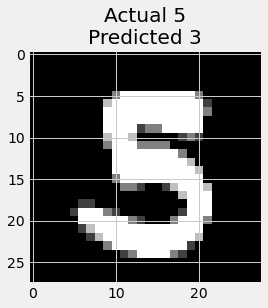

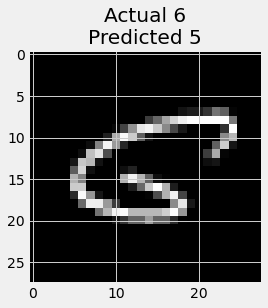

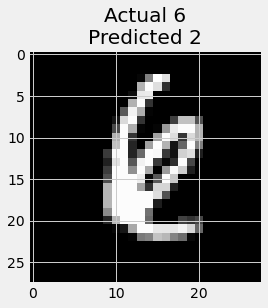

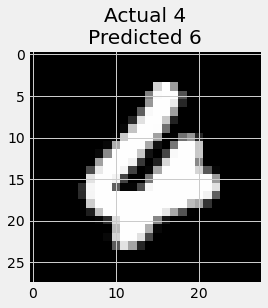

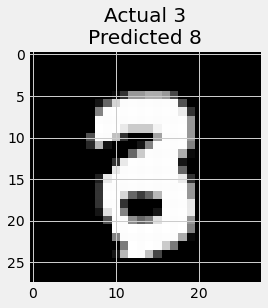

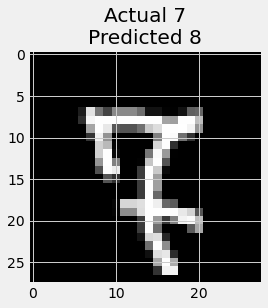

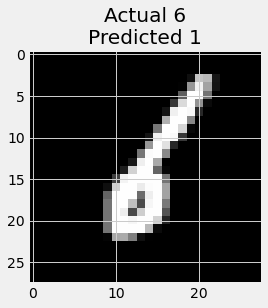

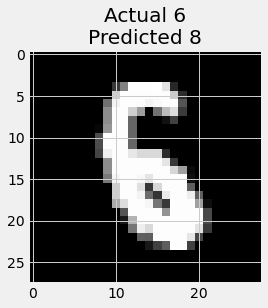

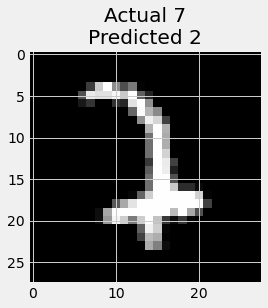

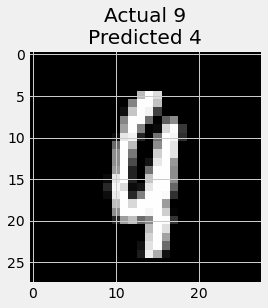

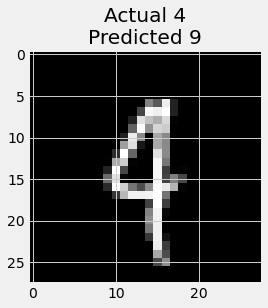

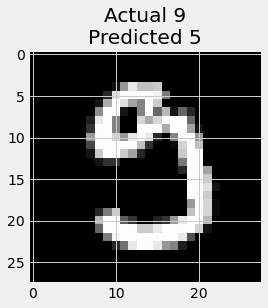

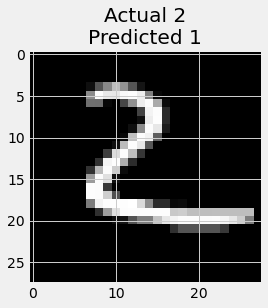

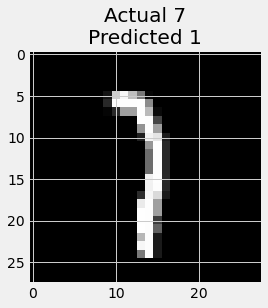

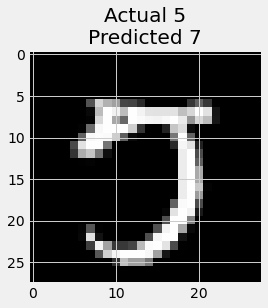

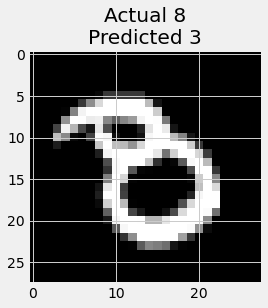

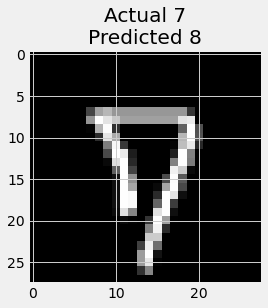

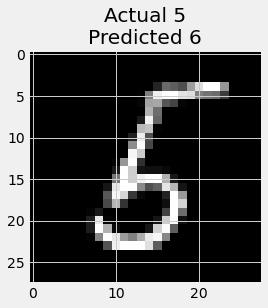

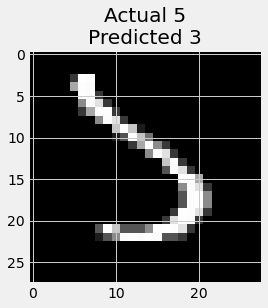

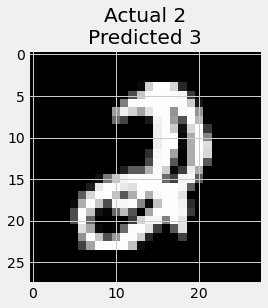

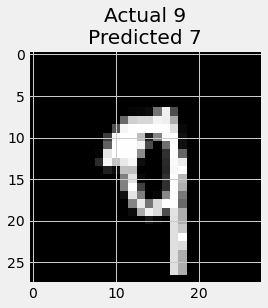

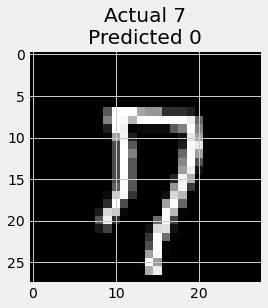

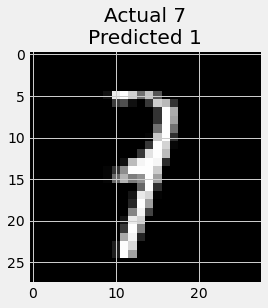

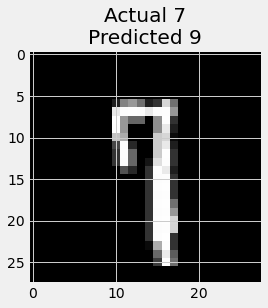

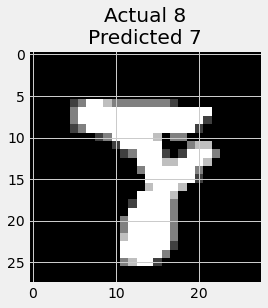

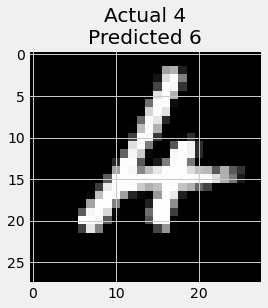

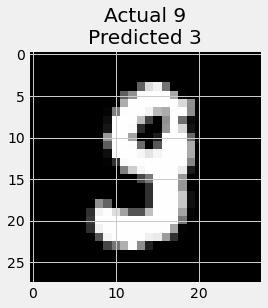

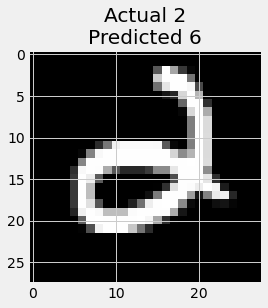

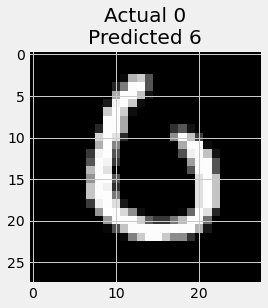

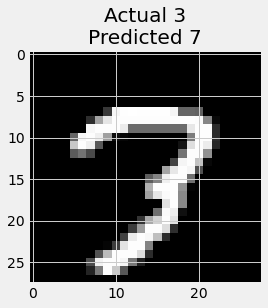

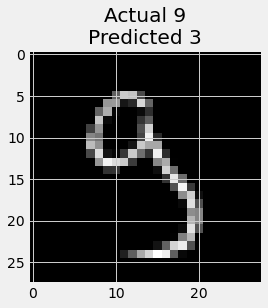

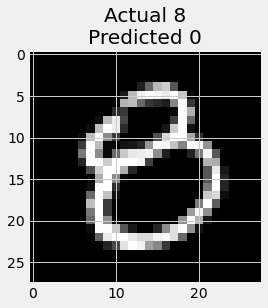

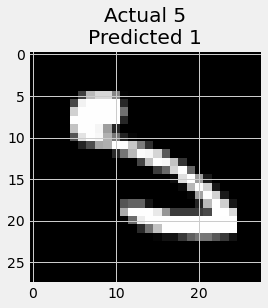

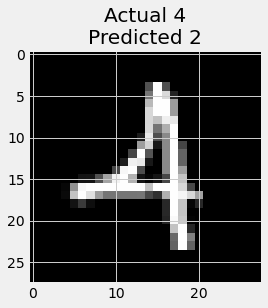

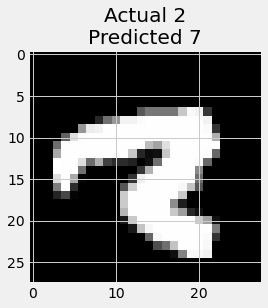

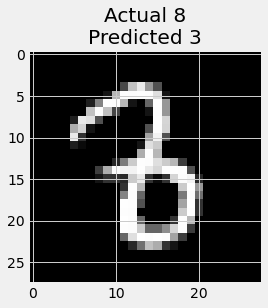

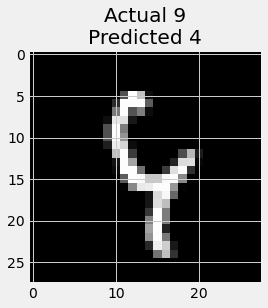

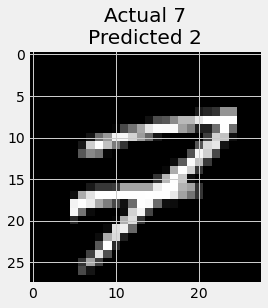

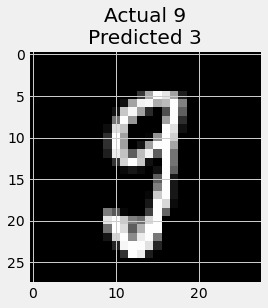

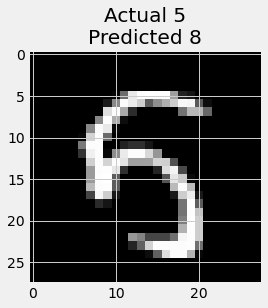

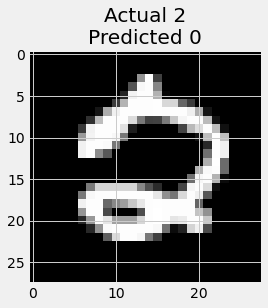

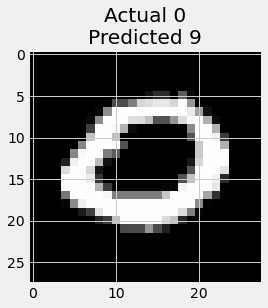

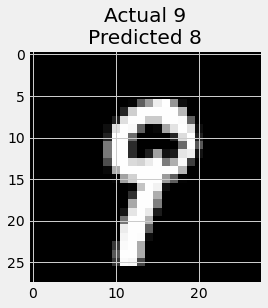

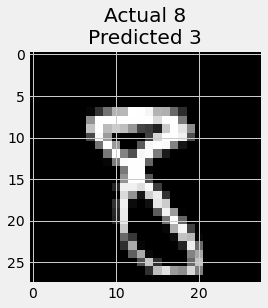

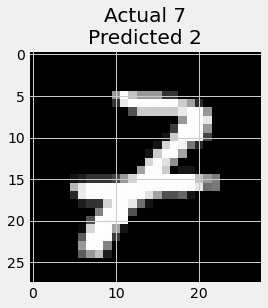

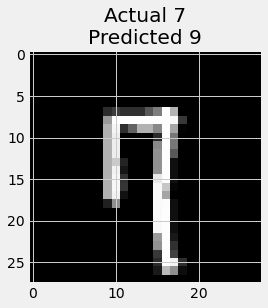

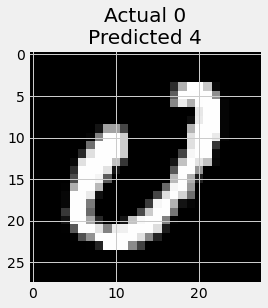

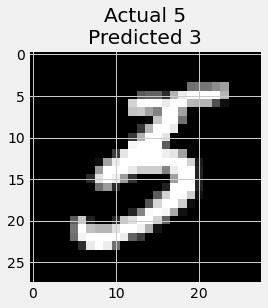

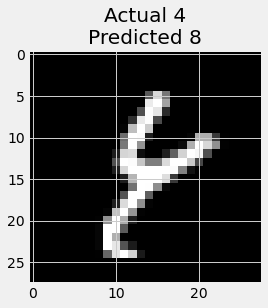

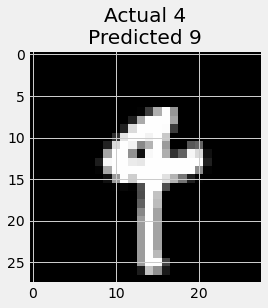

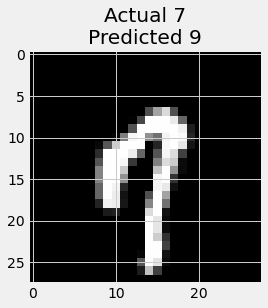

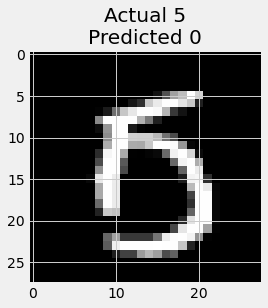

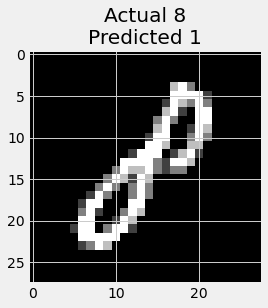

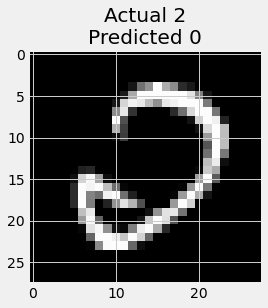

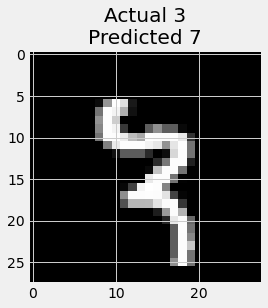

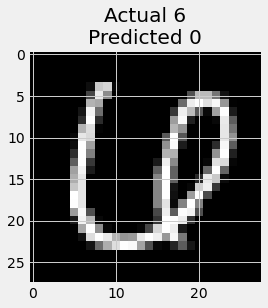

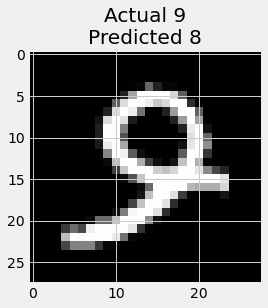

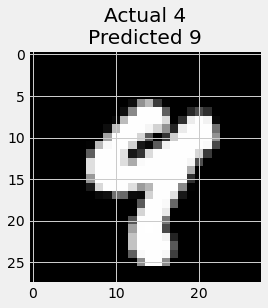

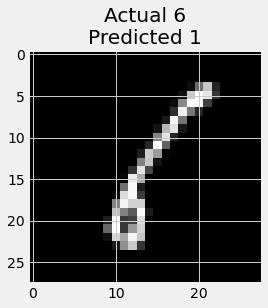

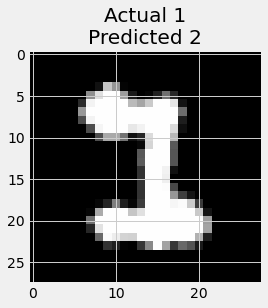

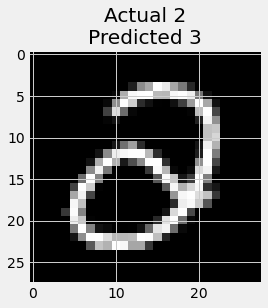

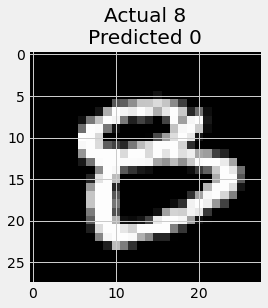

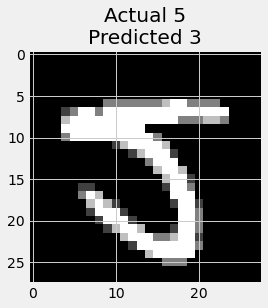

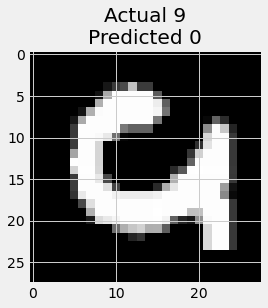

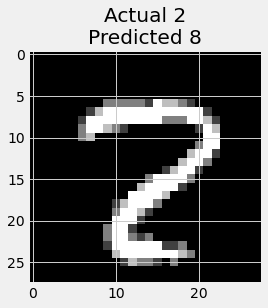

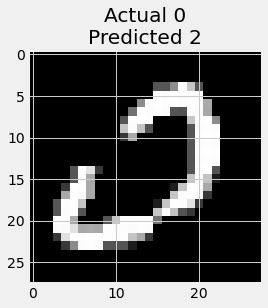

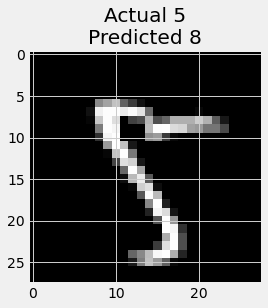

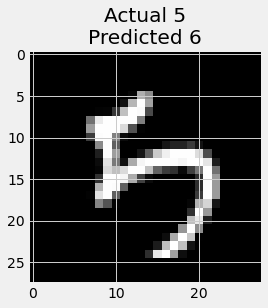

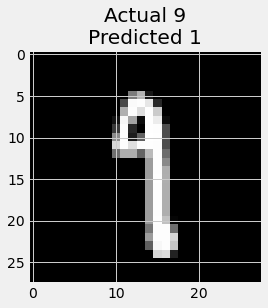

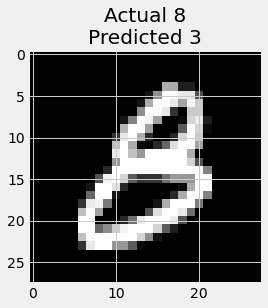

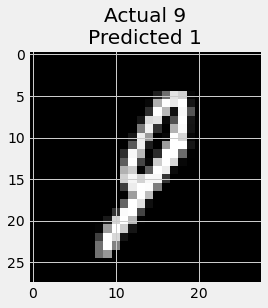

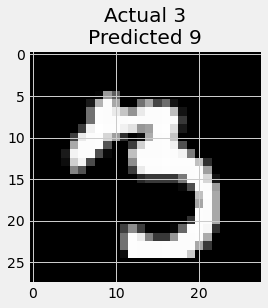

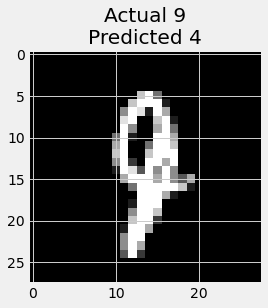

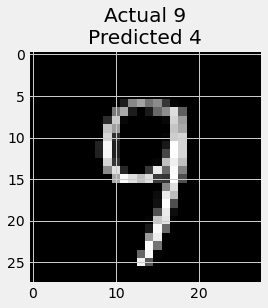

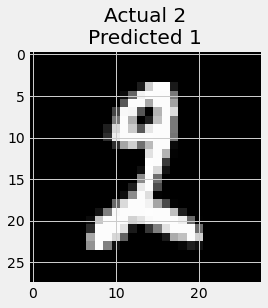

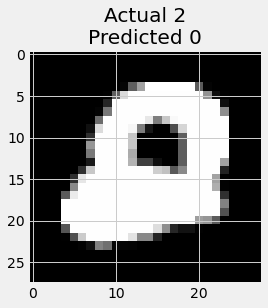

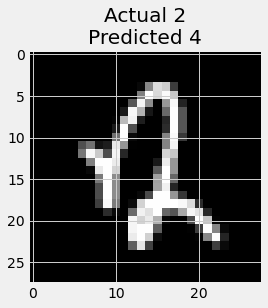

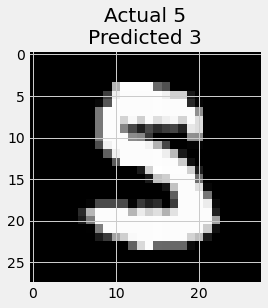

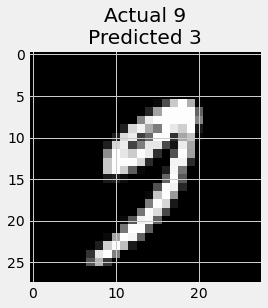

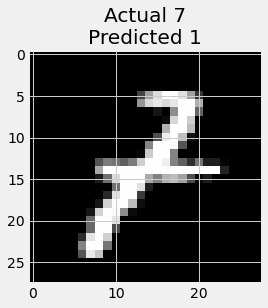

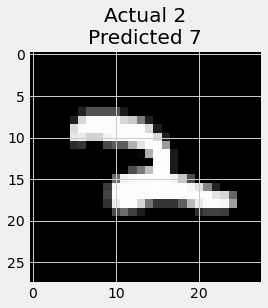

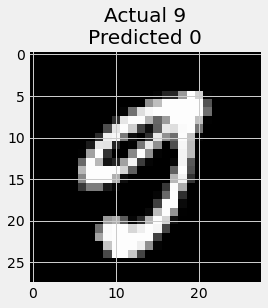

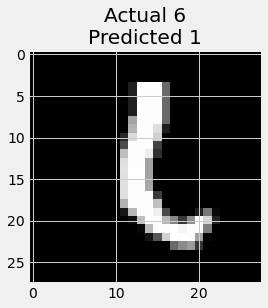

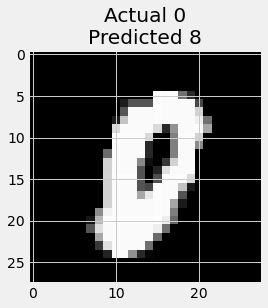

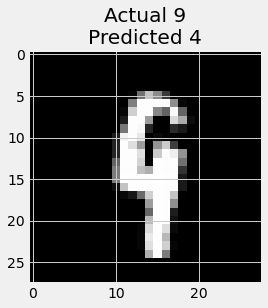

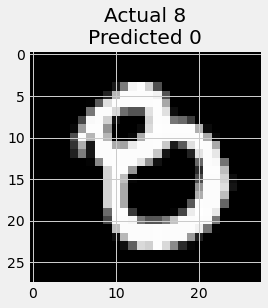

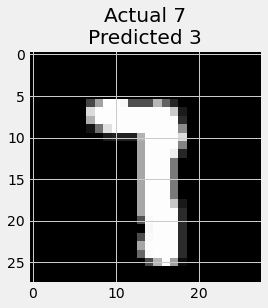

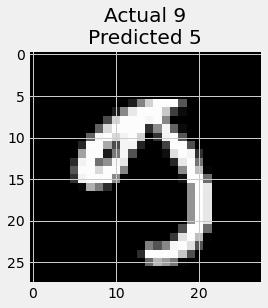

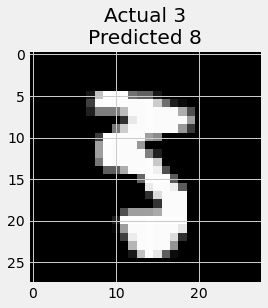

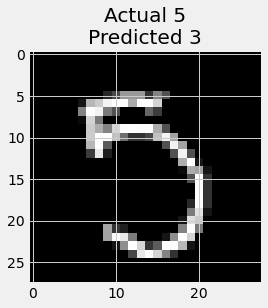

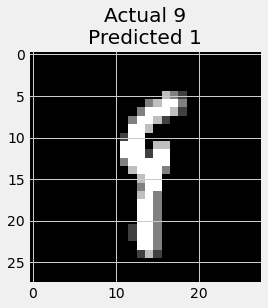

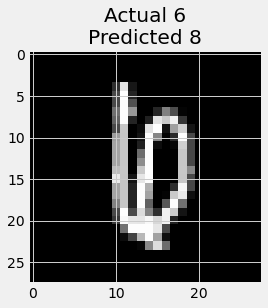

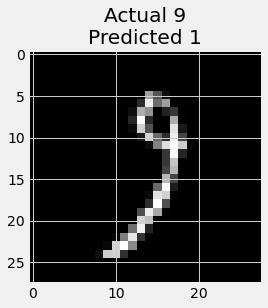

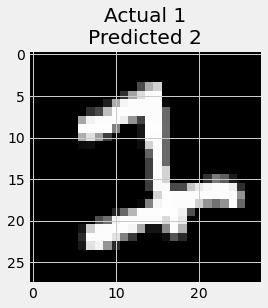

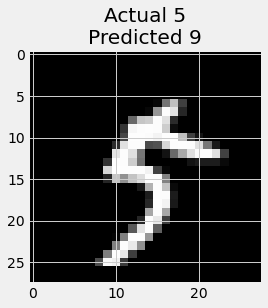

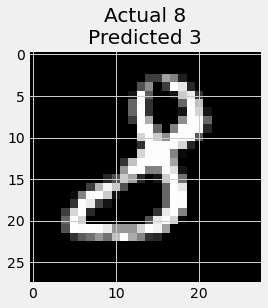

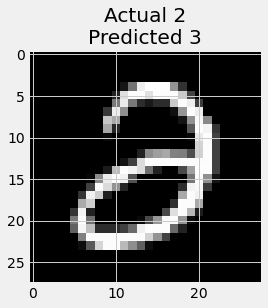

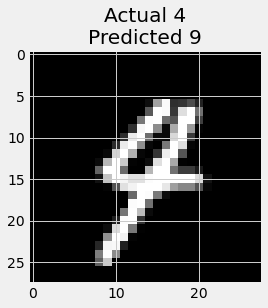

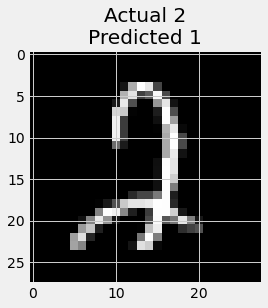

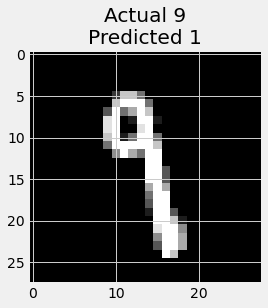

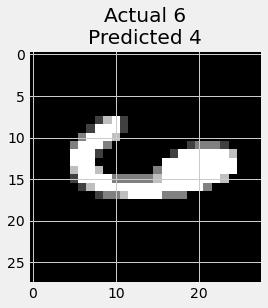

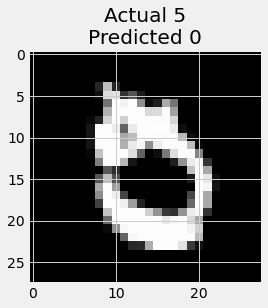

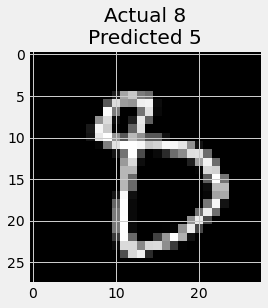

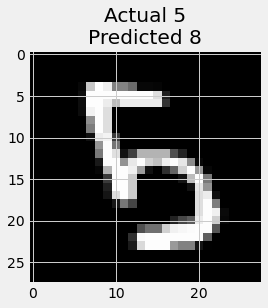

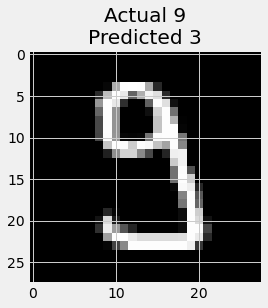

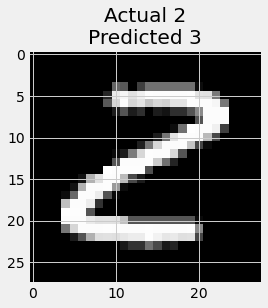

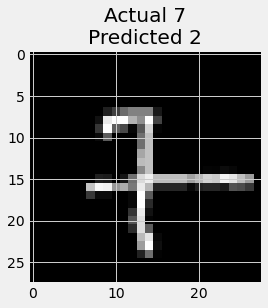

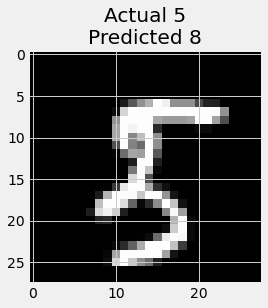

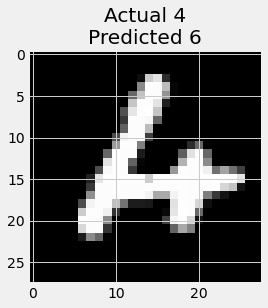

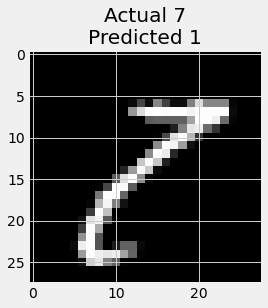

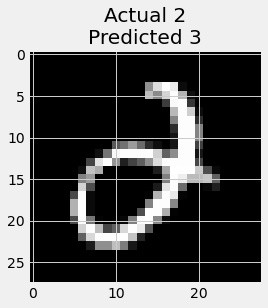

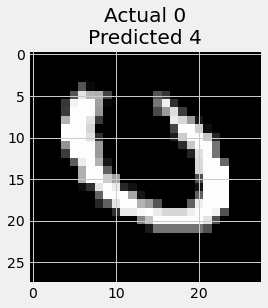

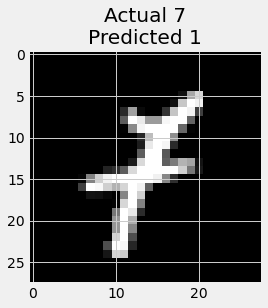

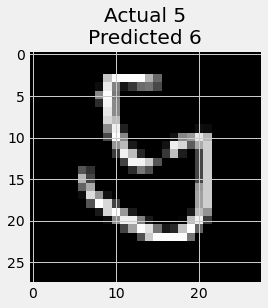

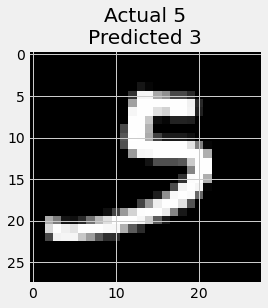

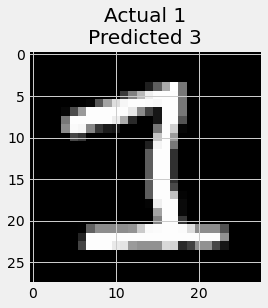

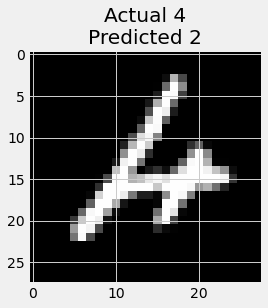

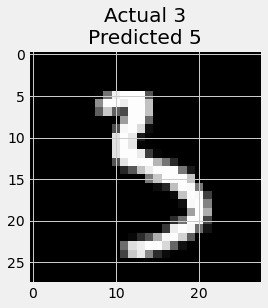

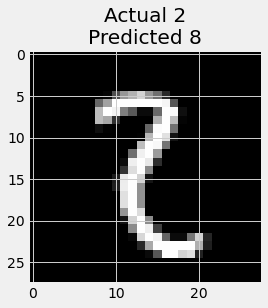

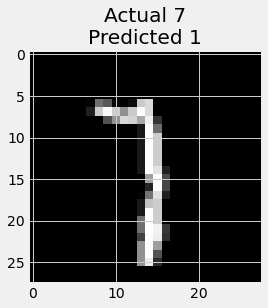

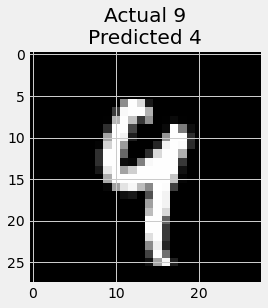

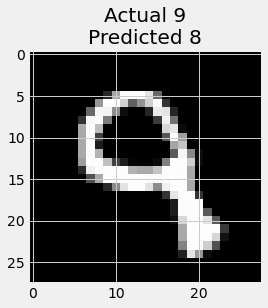

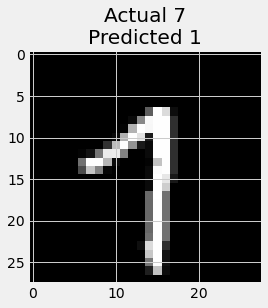

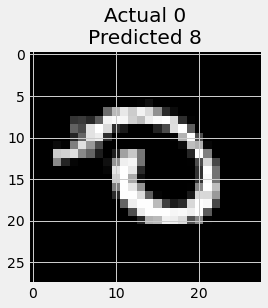

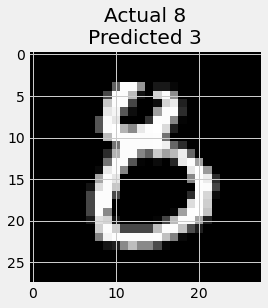

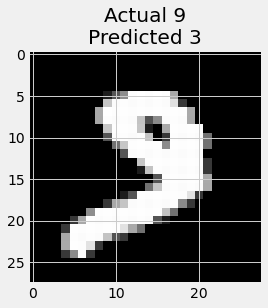

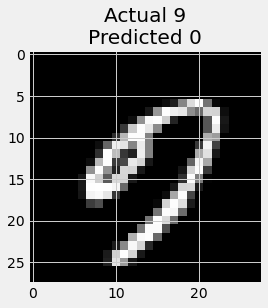

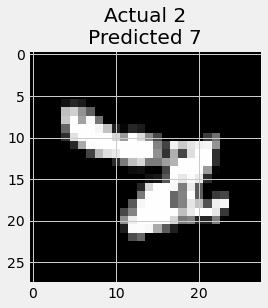

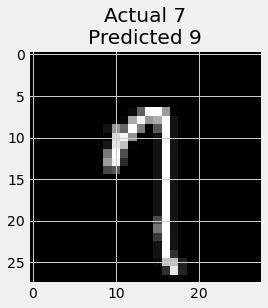

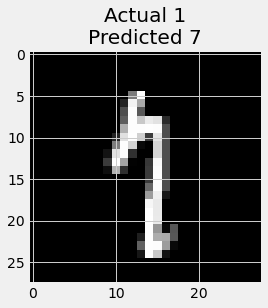

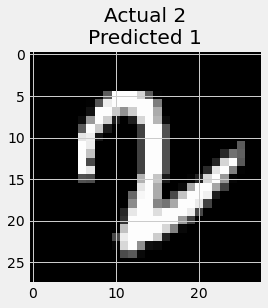

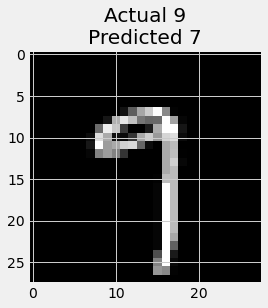

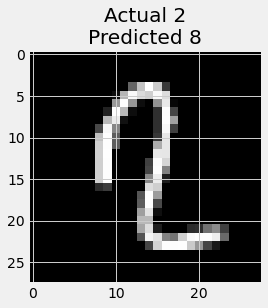

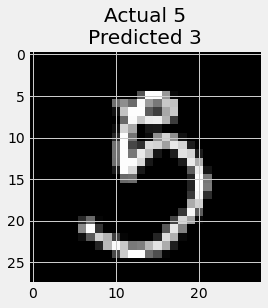

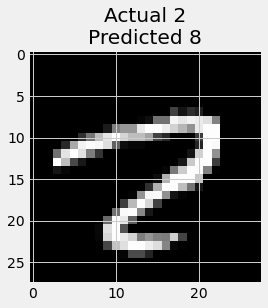

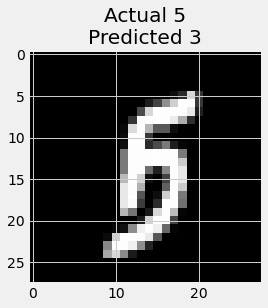

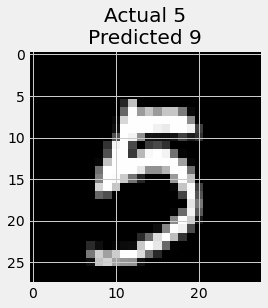

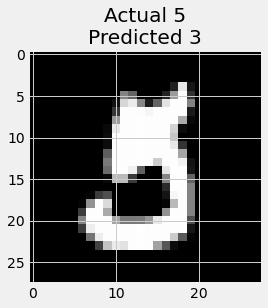

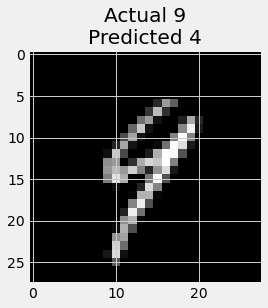

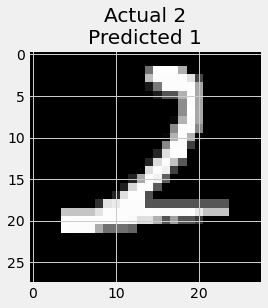

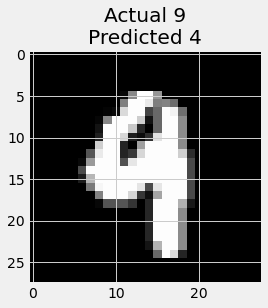

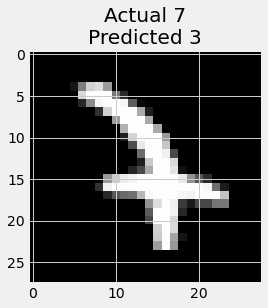

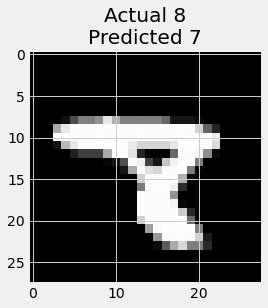

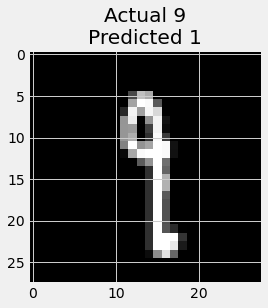

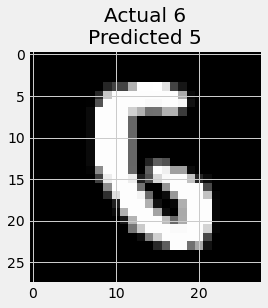

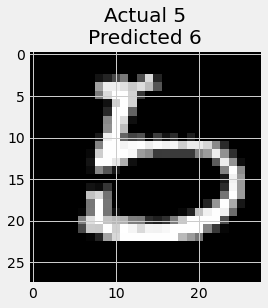

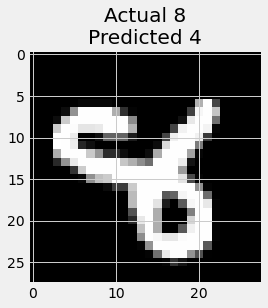

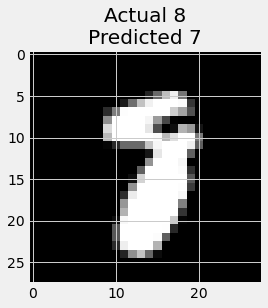

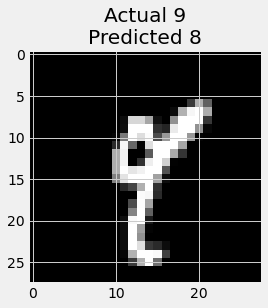

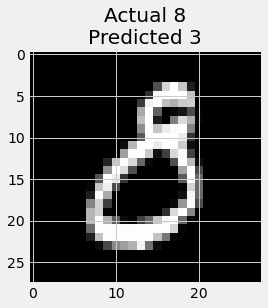

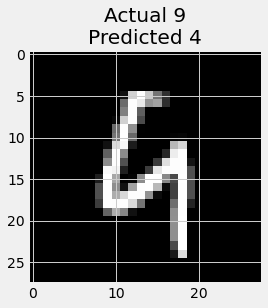

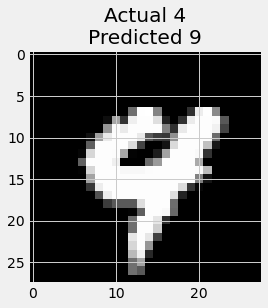

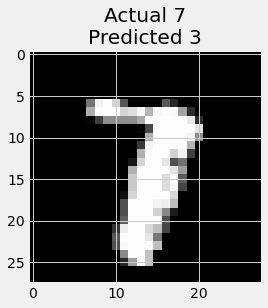

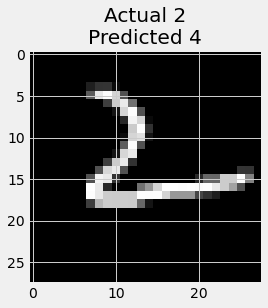

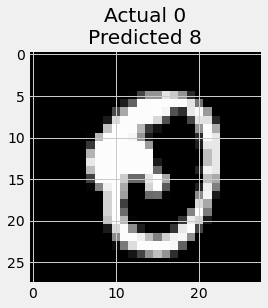

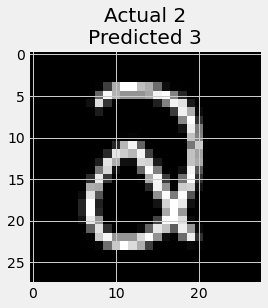

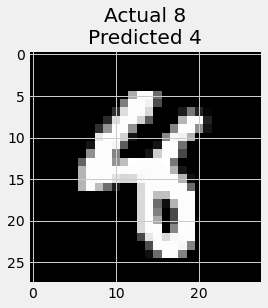

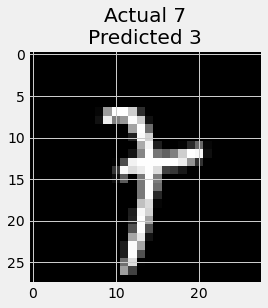

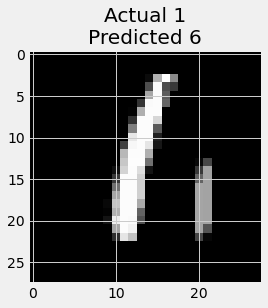

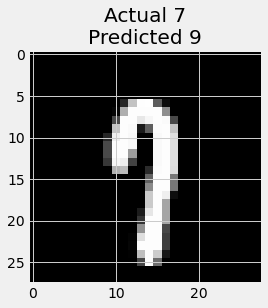

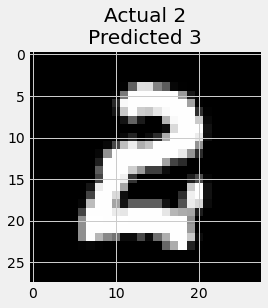

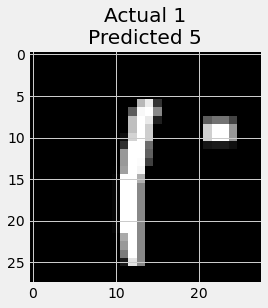

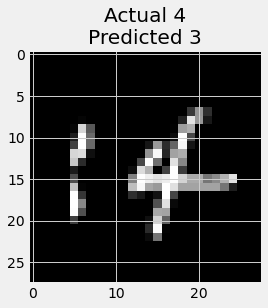

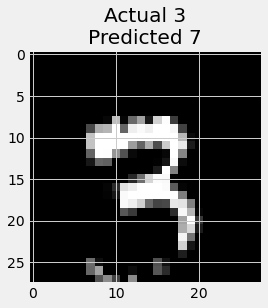

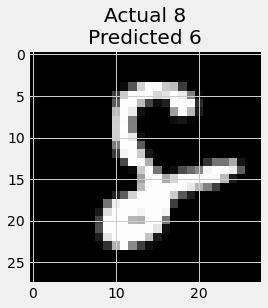

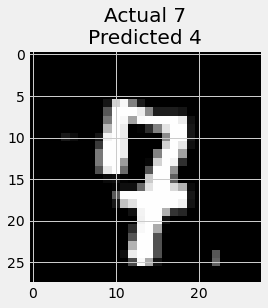

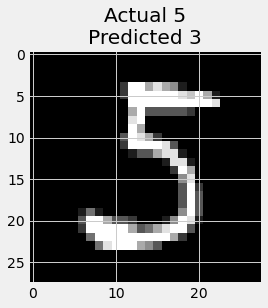

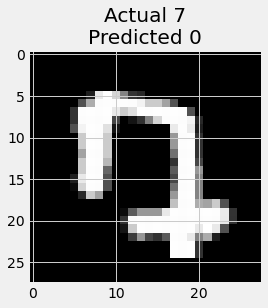

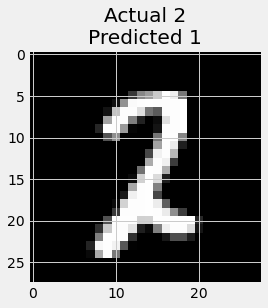

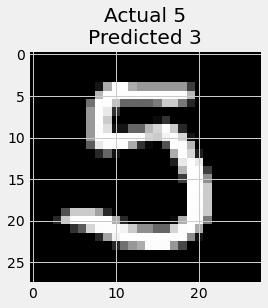

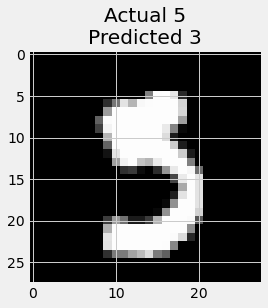

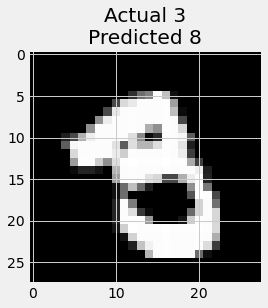

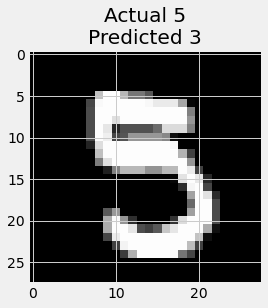

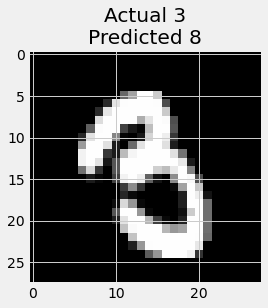

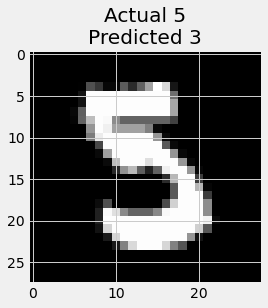

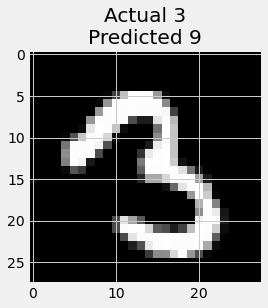

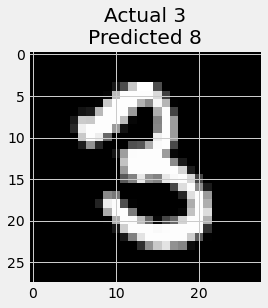

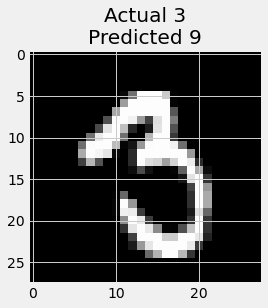

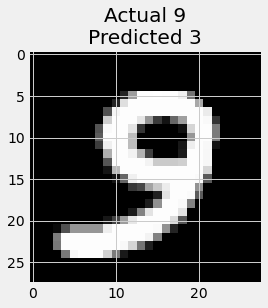

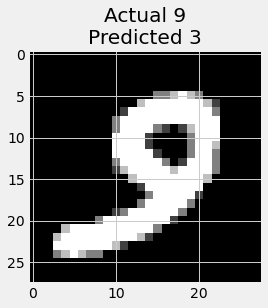

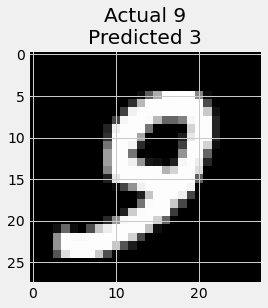

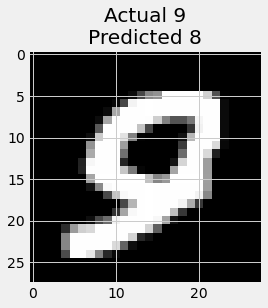

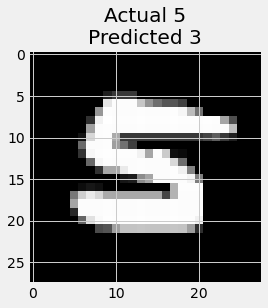

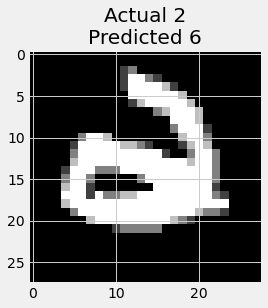

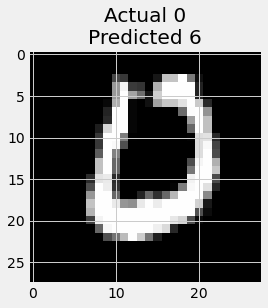

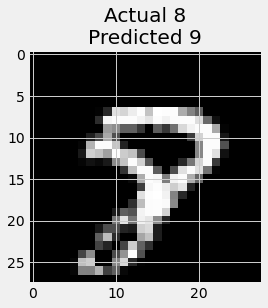

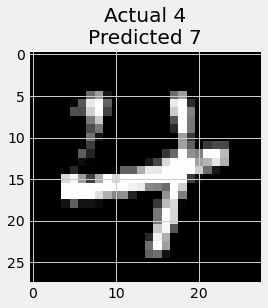

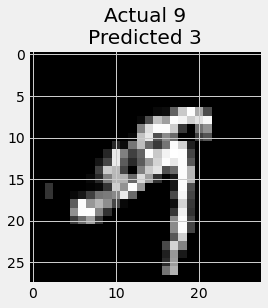

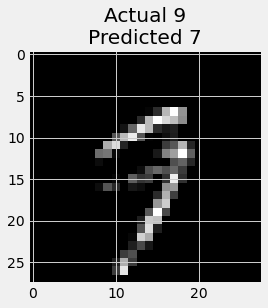

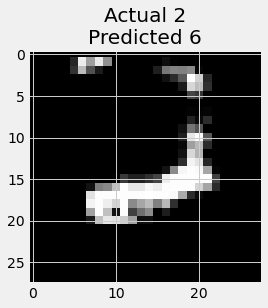

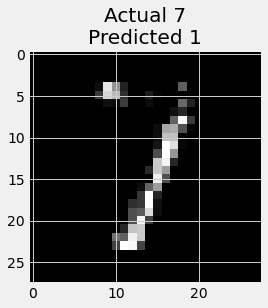

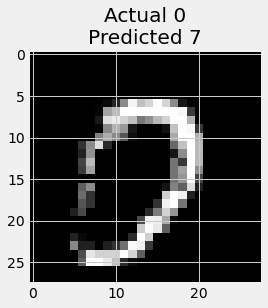

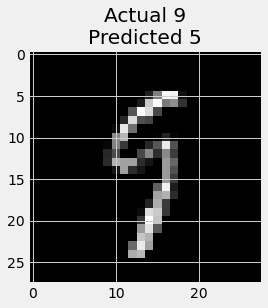

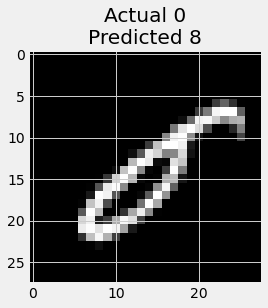

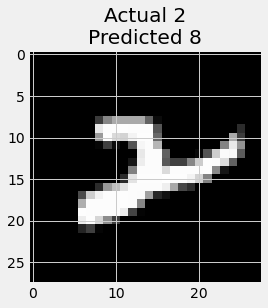

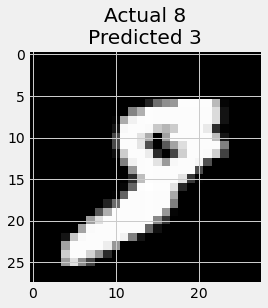

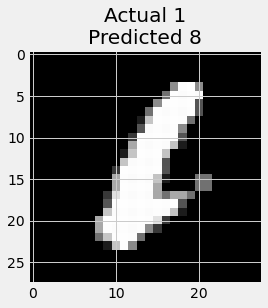

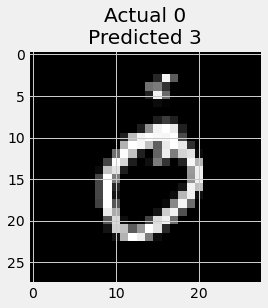

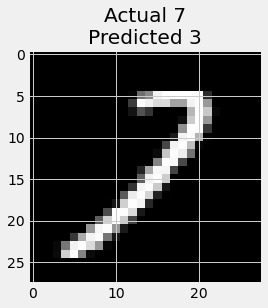

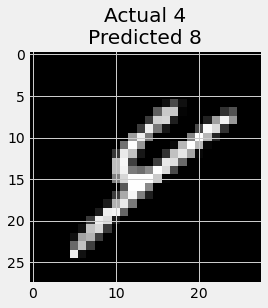

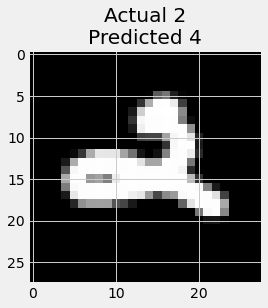

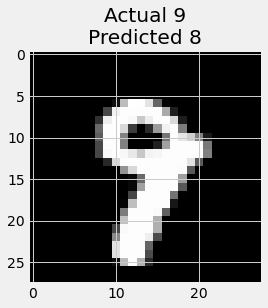

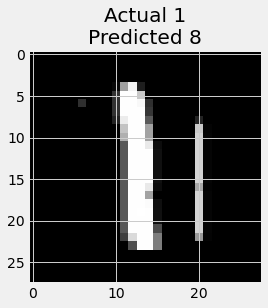

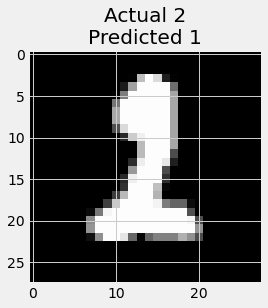

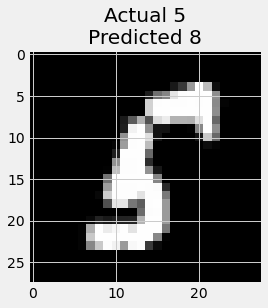

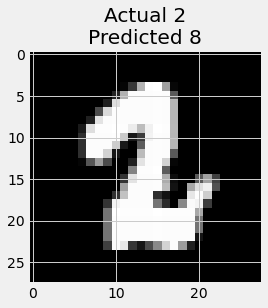

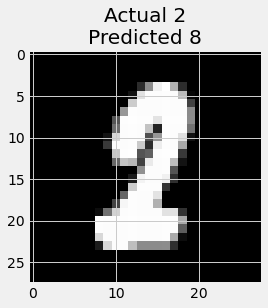

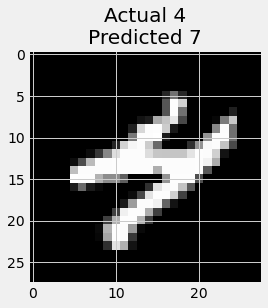

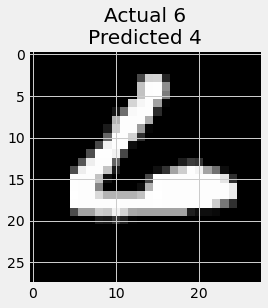

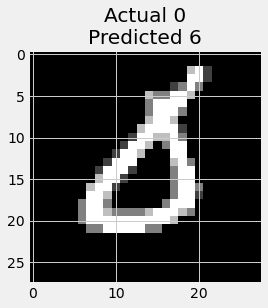

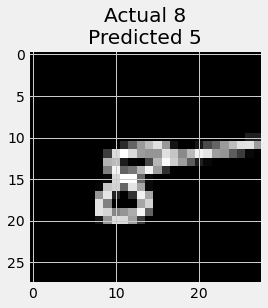

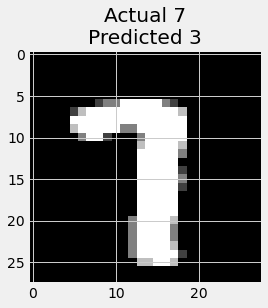

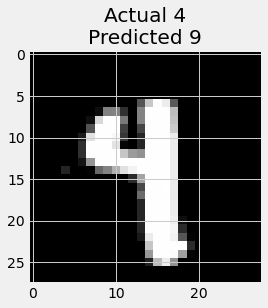

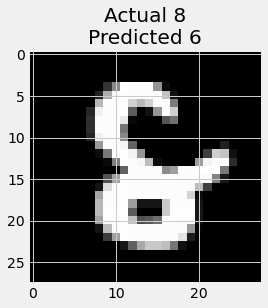

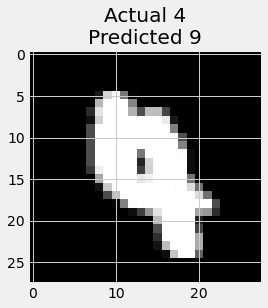

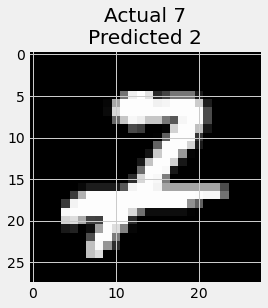

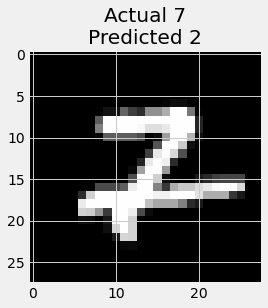

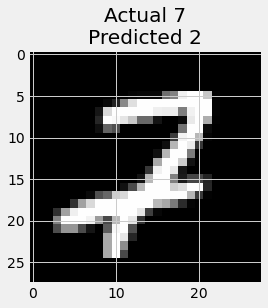

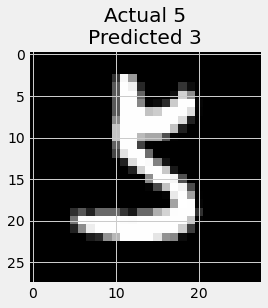

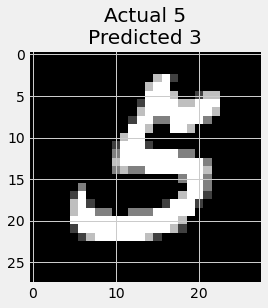

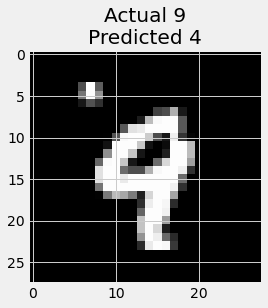

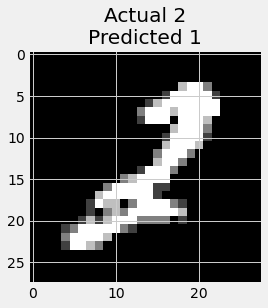

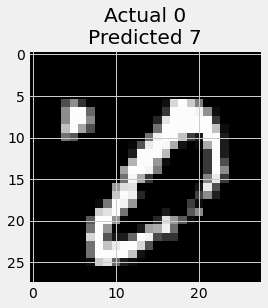

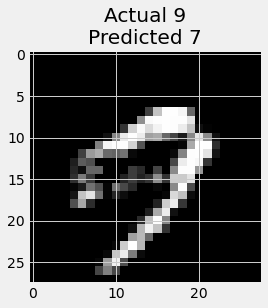

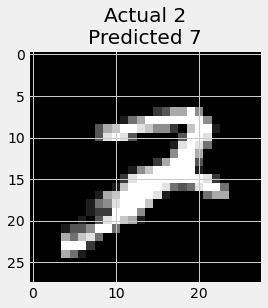

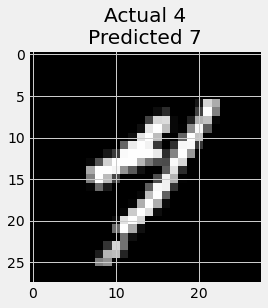

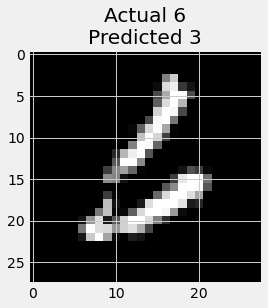

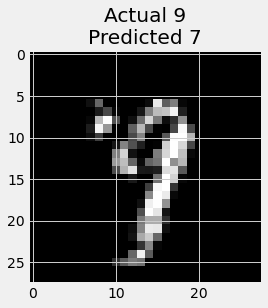

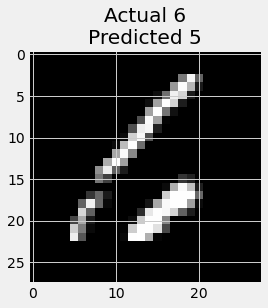

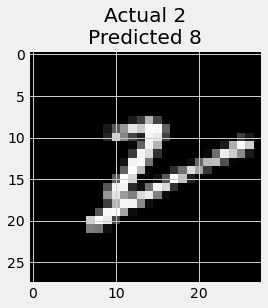

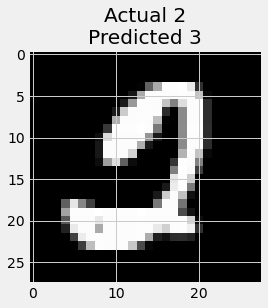

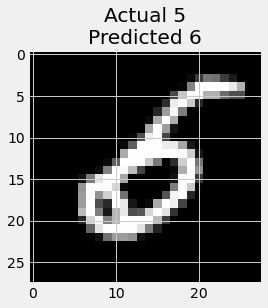

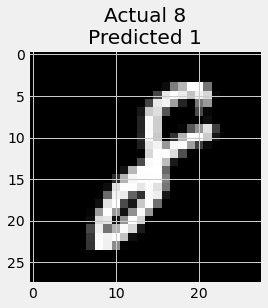

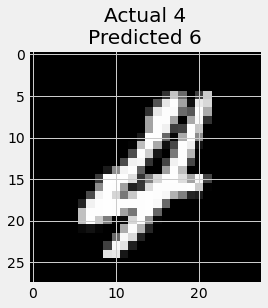

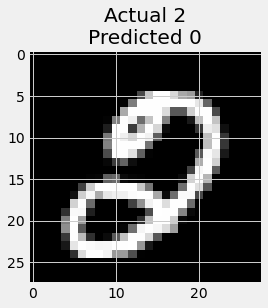

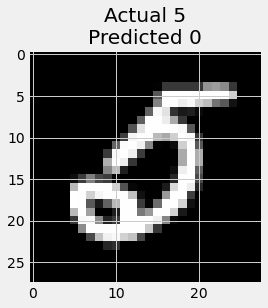

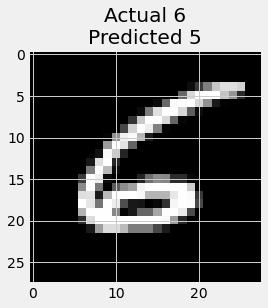

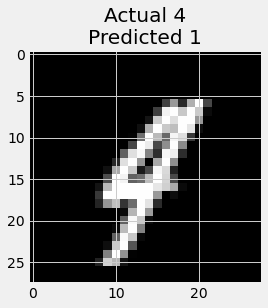

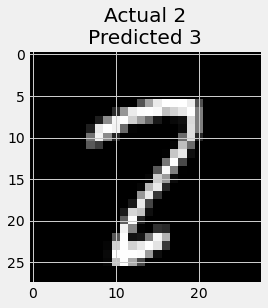

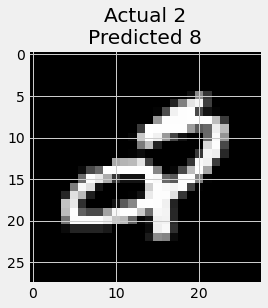

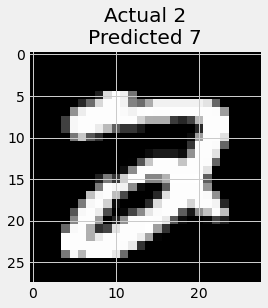

In [254]:
for counter, pred in enumerate(np.argmax(predictions, axis = 1)):
    if pred != Y_True[counter]:
        plt.imshow(X_test[counter], cmap=plt.get_cmap('gray'))
        plt.title(f'Actual {Y_True[counter]}\nPredicted {pred}')
        plt.show()